# 2. Machine Learning Problems

## 2a. Grocery Store Problem
**T** : Maximize sale by having a sortiment consisting of only relevant groceries. <br> 

**P** : Sale, alternatively amount of sortiment that is thrown away. <br>

**E** : Data from the other stores, namely sortiment, sale, geography, etc. Would assume it would be relevant to consider other similar datasets, such as the Rossman dataset (https://www.kaggle.com/c/rossmann-store-sales), in order to gain information about possible, relevant categories.  

## 2b. Oil Drilling Problem
Assuming that the goal is to maximize oil production (as stated in the text), and therefore not considering cost, etc. <br> 

**T** : Maximize the production of each platform. <br>

**P** : Size of the oil production at each platform. <br>

**E** : Data about the tools (drill size, drill density, etc.), the platforms, the weather, the crew, time, etc. 

## 2c. Autonomous Car Problem
**T** : Avoid crashing. <br>

**P** : Number of crashes. <br>

**E** : Data from the sensors, weather, GPS, etc. 

# 3. K-Nearest-Neighbours

## 3a. Cat-dog Problem

In [2]:
import numpy as np

In [7]:
cat = np.array((2, 4))
dog = np.array((5, 1))

class_point = np.array((3.5, 2.5))

dist_cat = np.linalg.norm(cat-class_point)
dist_dog = np.linalg.norm(dog-class_point)
print (dist_cat, dist_dog)

2.1213203435596424 2.1213203435596424


**NOTE** Assuming that we do not need to show calculations for points that are obviously close/far away from classification point.

K = 3: Need a tie breaker, because of two points being equally far from the point, namely **[2, 4]** and **[5, 1]** (as shown in code above) <br>
K = 9: Dog

## 3b. Iris dataset 

Automatically created module for IPython interactive environment


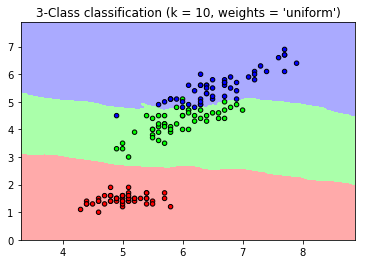

Counter({0: 50, 1: 50, 2: 50})


In [2]:
print(__doc__)

# Not in the code from Scikit-learns websitea
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

import collections

n_neighbors = 10

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, [0,2]]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

print(collections.Counter(y))

### Correcting number of flowers in each group, manually(?)

In [6]:
type(iris)

sklearn.utils.Bunch

In [2]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [3]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
n_setosa = np.count_nonzero(y == 0) # red
n_versicolor = np.count_nonzero(y == 1) # green 
n_virginica = np.count_nonzero(y == 2) # blue

In [5]:
n_setosa_corrected = n_setosa 
n_versicolor_corrected = n_versicolor - 1
n_virginica_corrected = n_virginica + 1

In [6]:
n_different_classes_corrected = [n_setosa_corrected, n_versicolor_corrected, n_virginica_corrected]

In [7]:
dict(zip(iris.target_names, n_different_classes_corrected))

{'setosa': 50, 'versicolor': 49, 'virginica': 51}

**NOTE** : Fully aware that we are able to get the same data from the _collections.Counter(y)_ however, I wrote this code before reading this, so I wanted to keep it. 

### 5
Example of a problem where KNN would not work well as a classifier is problems were the dataset is big, and contains a lot of (unnormalized) noise, because 
1. KNN stores all of the training data
2. is sensitive to irrelevant features and data scaling. <br>

One example would be (raw) hospital records.